# Comparing OLS and ARIMA for predicting the  SPX

## ARIMA:
Box Jenkins



https://www.youtube.com/watch?v=RCnSsUE69o0
https://www.youtube.com/watch?v=fJJdtPmvbdg
https://github.com/bhattbhavesh91/time_series_notebooks/blob/master/time_series_eda_and_white_noise_test/Ljung_Box_Statistics.ipynb
https://stats.stackexchange.com/questions/279551/building-an-arima-model-using-acf-pacf-etc#
https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

http://www.datasciencecourse.org/notes/time_series/time_series.pdf

https://github.com/MGCodesandStats/arima-model-statsmodels-python


Autocorrelation: https://github.com/kevinkurek/Random_Projects/blob/master/Time_Series_For_Stocks.


seasonality: https://en.wikipedia.org/wiki/Seasonality#Regression_analysis

below are used: 

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#step-3-%E2%80%94-the-arima-time-series-model

https://www.kaggle.com/berhag/co2-emission-forecast-with-python-seasonal-arima#6)-Find-optimal-parameters-and-build-SARIMA-model

## Rolling OLS



## MA

https://www.quantopian.com/posts/pandas-rolling-linear-regression

https://dzone.com/articles/rolling-window-regression-a-simple-approach-for-ti


##good article 
https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/



In [ ]:
!pip install statsmodels fbprophet 
# Need to reboot to isntall fbprophet
# 100% of this code worked in 2018, APIs have changed... 

In [2]:
import math
import datetime as dt
import itertools
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

!pip install pandas-datareader
import pandas_datareader.data as web

import yfinance as yf

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

from fbprophet import Prophet

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'fbprophet'

# Rolling Least Squards Regression on the last N values to predict 



<AxesSubplot:xlabel='Date'>

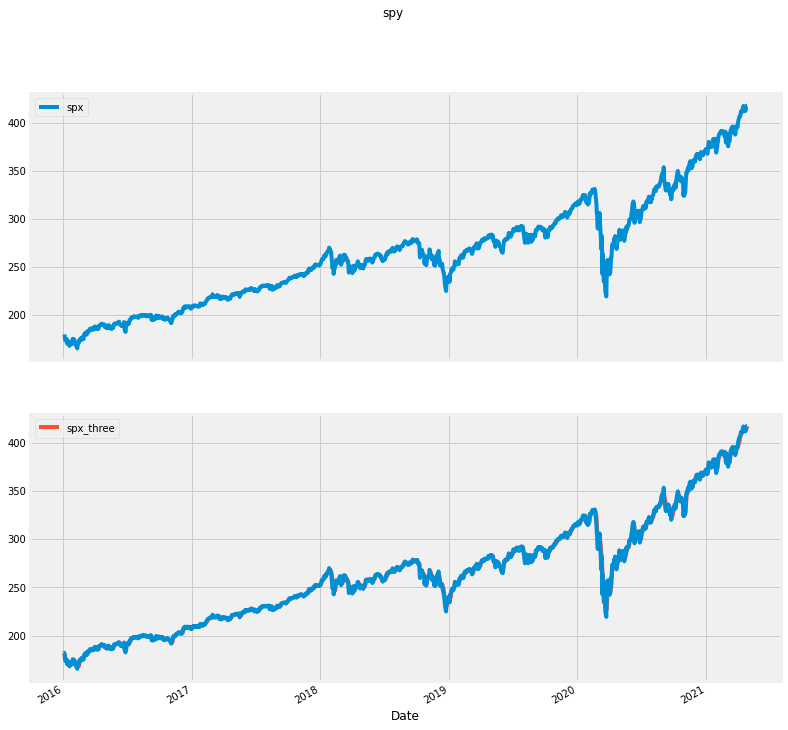

In [3]:
share = 'spy' # lots of hard coding
spx = web.DataReader(share, "yahoo", '2016-1-1')

spx = spx["Adj Close"]
spx_three = np.round(spx.rolling(window = 3, center = False).mean(), 2)

df = pd.DataFrame({
    "spx":spx,
    "spx_three":spx_three
                  })

df=df.dropna()

df.plot(title=share,figsize=(12,12),subplots=(2,1))


spx.plot(grid = True) # Plot the adjusted closing price of AAPL

In [4]:
def rollingOLS(myList ,n = 10): 
  for i in range(1, 11):
    
    y=myList[len(myList)-(n+1):]
    y=myList[len(myList)-(n+1):]#possiably needed, might be a internal error with python/colab
  
    
    yy =np.asarray(y).reshape((-1, 1)) 
    x= range(len(y))
    x = np.asarray(x).reshape((-1, 1))
    reg = LinearRegression().fit(X = x,y = yy)
    tmp= reg.predict(np.asarray([len(y)+i]).reshape(-1, 1))
    myList.append(tmp[0][0])
  
  return myList
  
  
total_10 = rollingOLS(df.spx_three.tolist() ,10) # rollingOLS on the last 10 values 
total_20 = rollingOLS(df.spx_three.tolist() ,20)
total_30 = rollingOLS(df.spx_three.tolist() ,30)

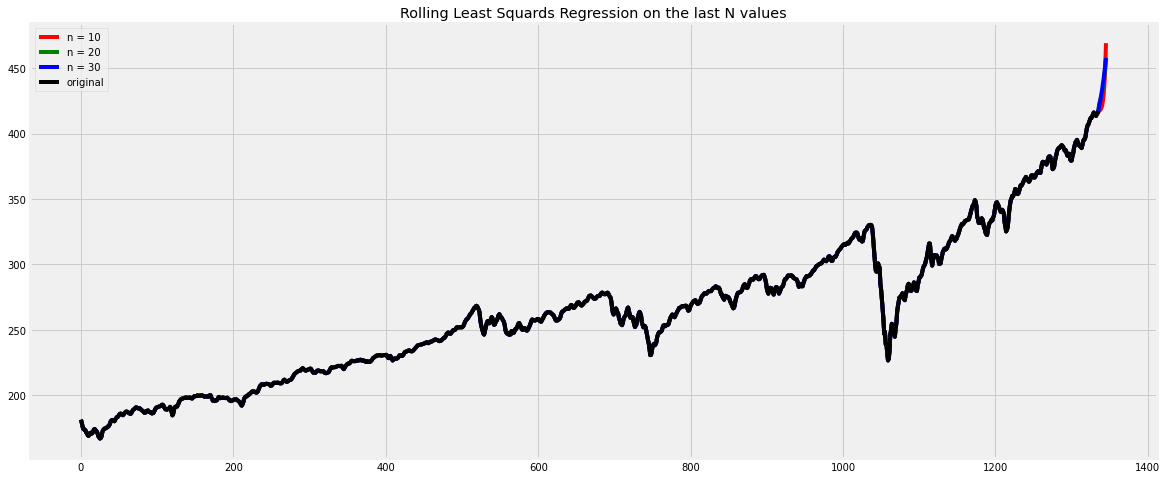

In [5]:
plt.figure(figsize=(18,8))
plt.title("Rolling Least Squards Regression on the last N values")

plt.plot(total_10,'r')
plt.plot(total_20,'g')
plt.plot(total_30,'b')


plt.plot(df.spx_three.values , 'k')

plt.legend(['n = 10','n = 20','n = 30','original'])


plt.show()

# Rolling Polynomial Regression on the last N vlaues to predict 

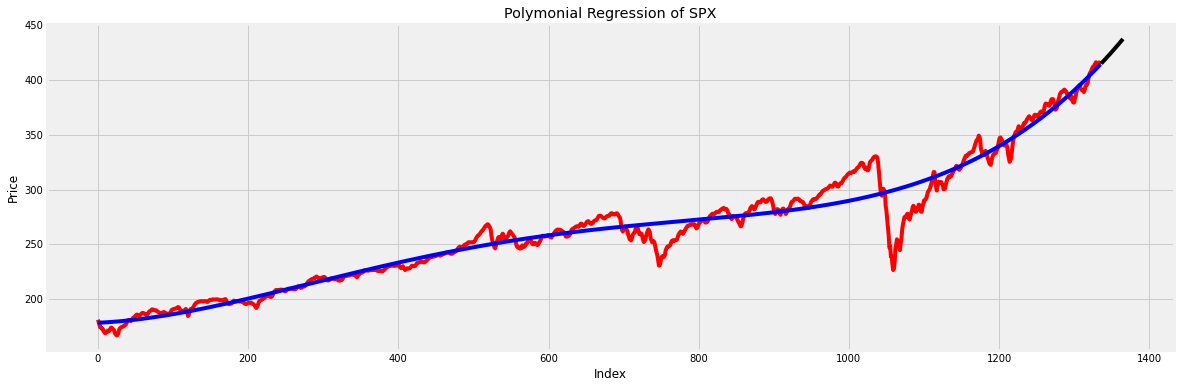

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

spx = web.DataReader("spy", "yahoo", '2016-1-1')["Adj Close"]
df = pd.DataFrame({"spx":spx
                  ,"spx_three": np.round(spx.rolling(window = 3, center = False).mean(), 2)
                  }).dropna()
size = len(df.spx_three.to_numpy())
X = np.arange(size).reshape((-1, 1))

y = df.spx_three.to_numpy().reshape((-1, 1))
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

output = pol_reg.predict(poly_reg.fit_transform(X))
    
ls = [] 
for i in range(30):
  tmp = pol_reg.predict(poly_reg.fit_transform([[size + i]]))
  ls.append(tmp[0][0])



def viz_polymonial():
    plt.figure(figsize=(18,6))
   #plt.scatter(X, y, color='red')
    plt.plot(X, y, color='red')
    plt.plot(X,output, color='blue')
    tmp =range(len(X.reshape(1,-1)[0])+30)
    plt.plot(tmp[-30:], ls, color='black')
    plt.title('Polymonial Regression of SPX')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.show()
    return

viz_polymonial()



In [7]:
size =100 
X = np.arange(size).reshape((-1, 1))

y = df.spx_three.to_numpy()[-size:]
y = y.reshape((-1, 1))
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


output = pol_reg.predict(poly_reg.fit_transform(X))

last_100_of_train = output 
#==============================================
first_10 = [] 
for i in range(10):
  tmp = pol_reg.predict(poly_reg.fit_transform([[size + i]]))
  first_10.append(tmp[0][0])
#==============================================

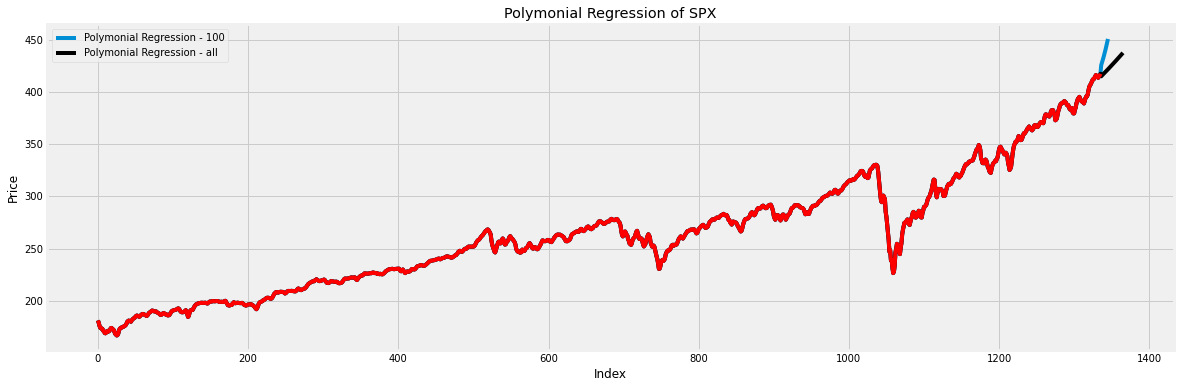

In [8]:
y = df.spx_three.to_numpy()# [-size:]

plt.figure(figsize=(18,6))

plt.plot(np.concatenate([y, first_10]), label=f'Polymonial Regression - {size}')
plt.plot(np.concatenate([y, ls]), color='black', label='Polymonial Regression - all')
plt.plot(y, color='red')

plt.title('Polymonial Regression of SPX')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# SVM.svr


In [ ]:
from sklearn.svm import SVR 
spx = web.DataReader("spy", "yahoo", '2016-1-1')["Adj Close"]
df = pd.DataFrame({"spx":spx
                  ,"spx_three": np.round(spx.rolling(window = 3).mean(), 2)
                  }).dropna()

def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    print('svr_lin')
    svr_lin  = SVR(kernel='linear', C=1e3)
    print('svr_poly')
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    print('svr_rbf')
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Fit regression model
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

#tmp = [ str(x) for x in df.reset_index()['Date']]
predicted_price = predict_prices(range(len(df.reset_index()['Date'])), df.spx_three.tolist(), [31])

svr_lin
svr_poly
svr_rbf


In [ ]:
predicted_price = predict_prices(range(), df.spx_three.tolist(), [31])

In [ ]:
len(df.reset_index()['Date'])

# N day Moving Average to predict 


<AxesSubplot:title={'center':'SPX 500'}, xlabel='Date'>

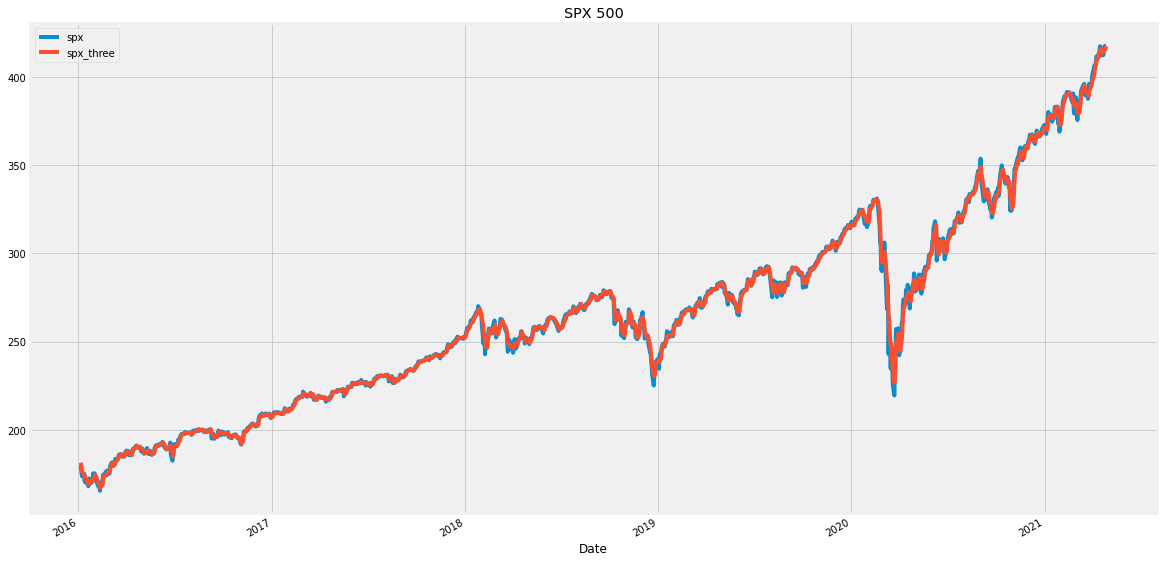

In [9]:
spx = web.DataReader("spy", "yahoo", '2016-1-1')["Adj Close"]
df = pd.DataFrame({"spx":spx
                  ,"spx_three": np.round(spx.rolling(window = 3, center = False).mean(), 2)
                  }).dropna()
                  
df.plot(title="SPX 500",figsize=(18,10))

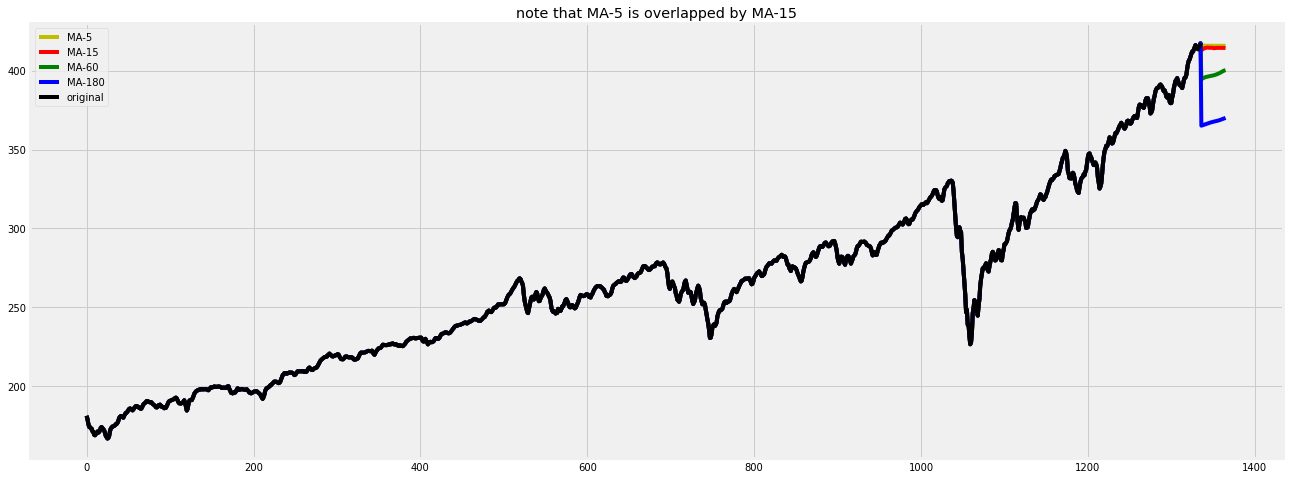

In [10]:
y=df.spx_three.values # .values to avoid np.asarray conversion...  
y=y[-30:]
yy =y.reshape((-1, 1)) 


x= range(len(y))
x = np.asarray(x).reshape((-1, 1))  

# dfToList = df.spx_three.tolist() # using this to save computation will cause python to treat the below 4 list as the same object -_- 

total_5   = df.spx_three.tolist()
total_15  = df.spx_three.tolist()
total_60  = df.spx_three.tolist()
total_180 = df.spx_three.tolist()


for i in range(1, 31):
  
  
  vals = total_5[-5:]     
  tmp = sum(vals) / float(len(vals)) #n day moving average 
  total_5.append(tmp)
  
  vals = total_15[-15:]     
  tmp = sum(vals) / float(len(vals)) #n day moving average
  total_15.append(tmp)
  
  vals = total_60[-60:]     
  tmp = sum(vals) / float(len(vals)) #n day moving average 
  total_60.append(tmp)
  
  vals = total_180[-180:]     
  tmp = sum(vals) / float(len(vals)) #n day moving average 
  total_180.append(tmp)
 

plt.figure(figsize=(20,8))
plt.plot(total_5,'y')
plt.plot(total_15,'r')
plt.plot(total_60,'g')
plt.plot(total_180,'b')

plt.plot(df.spx_three.values , 'k')

plt.legend(['MA-5','MA-15','MA-60','MA-180','original'])
plt.title("note that MA-5 is overlapped by MA-15")
plt.show()

In [11]:
# b : blue.
# g : green.
# r : red.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white




# Now lets try prediting with ARIMA 

In [12]:
spx = web.DataReader("spy", "yahoo", '2016-1-1')["Adj Close"]
df = pd.DataFrame({"spx":spx
                  ,"spx_three": np.round(spx.rolling(window = 3, center = False).mean(), 2)
                  }).dropna()

[source](https://people.duke.edu/~rnau/411arim3.htm) 

After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. Of course, with software like Statgraphics, you could just try some different combinations of terms and see what works best. But there is a more systematic way to do this. By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed. You are already familiar with the ACF plot: it is merely a bar chart of the coefficients of correlation between a time series and lags of itself. The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.




## Instead of differencing, lets try seasonal decomposistion and than differencing


c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if __name__ == '__main__':


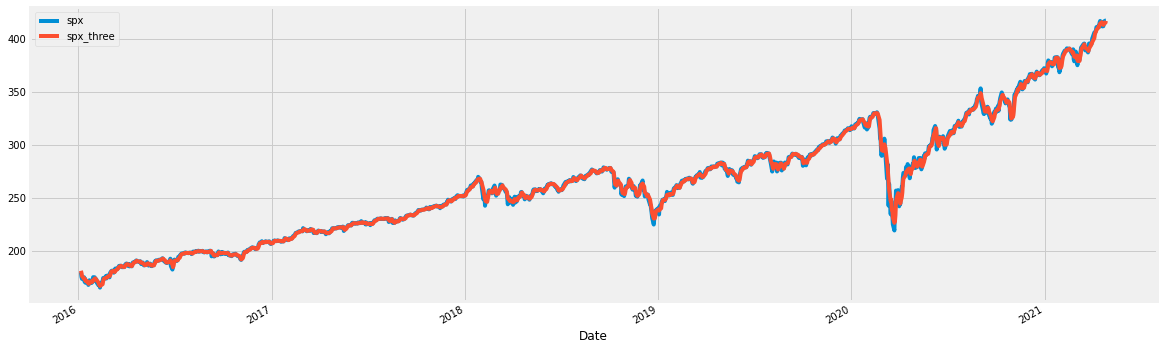

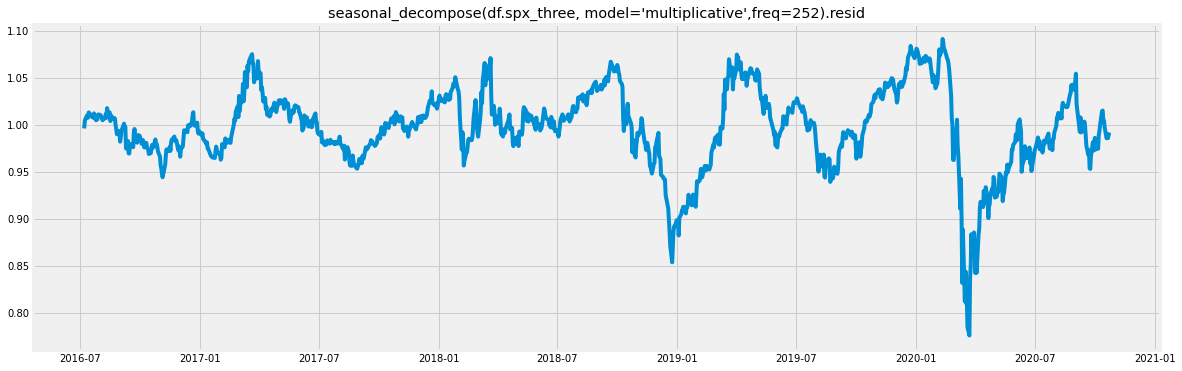

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

spx = web.DataReader("spy", "yahoo", '2016-1-1')["Adj Close"]
df = pd.DataFrame({"spx":spx
                  ,"spx_three": np.round(spx.rolling(window = 3, center = False).mean(), 2)
                  }).dropna()
df.plot(figsize=(18,6))

result = seasonal_decompose(df.spx, model='multiplicative',freq=252)#990


df2 = pd.DataFrame({
    "trend":result.trend,
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})

plt.figure(figsize=(18,6))
plt.title("seasonal_decompose(df.spx_three, model='multiplicative',freq=252).resid")
plt.plot(df2.resid)
plt.show()

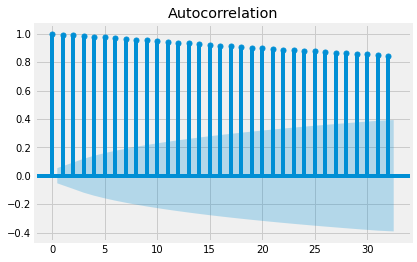

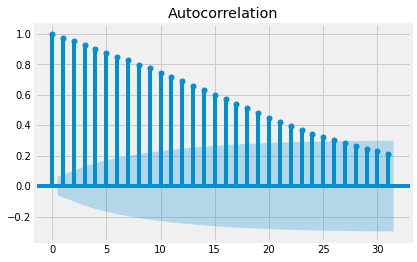

In [14]:
df2=df2.dropna()
preventDoubleImage = plot_acf(df.spx)
preventDoubleImage = plot_acf(df2.resid)



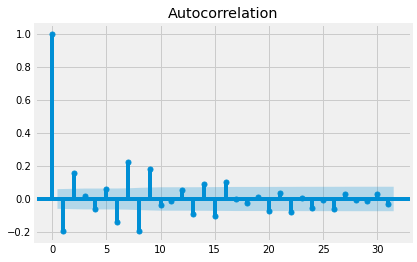

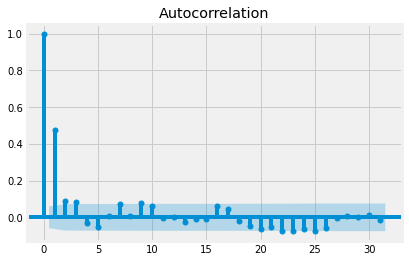

In [15]:
spx_1DayDiff = df2.resid - df2.resid.shift(1)
spx_1DayDiff=spx_1DayDiff.dropna()
preventDoubleImage = plot_acf(spx_1DayDiff)

spx_2DayDiff = df2.resid - df2.resid.shift(2)
spx_2DayDiff=spx_2DayDiff.dropna()
preventDoubleImage = plot_acf(spx_2DayDiff)

In [16]:
period = 10
period2 = 11

In [17]:
train = df2.resid.dropna()
lenTrain = len(train)

# p (Auto-Regressive) = periods laged of dependent variable.
# d (Moving Average)  = lagged forecast errors in prediction function
# q (Differences)     =  the number of nonseasonal differences

warnings.filterwarnings('ignore')

model_arima = ARIMA(train,order=(11, 2, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)



-6995.025431549517


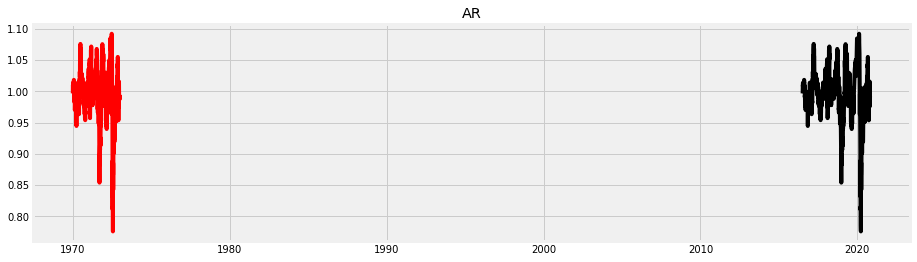

In [18]:
predictions= model_arima_fit.forecast(steps=30)[0]

plt.figure(figsize=(14,4))
plt.title("AR")
plt.plot(np.append(train,predictions),c='r')
plt.plot(train,c='k')
plt.show()

## Alrighty, now lets try it with differencing



array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

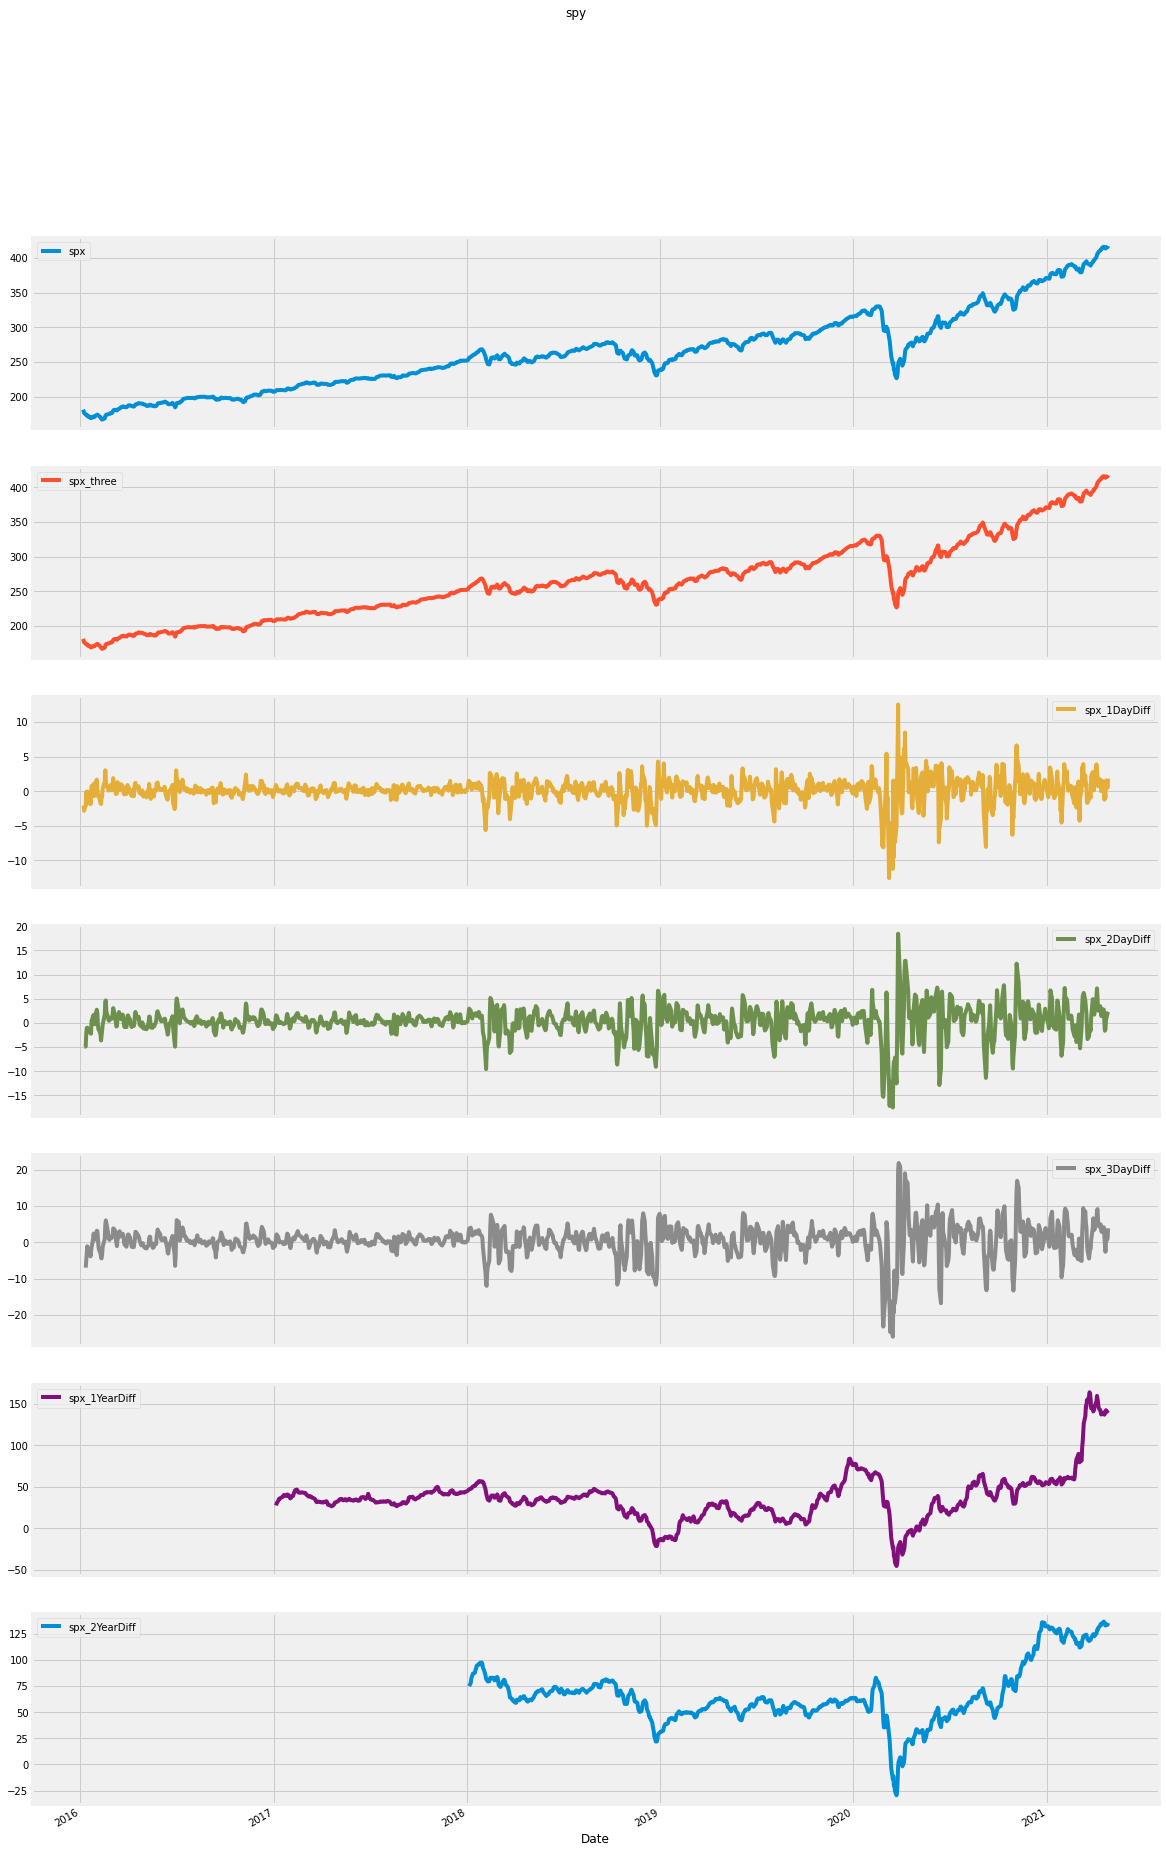

In [19]:
spx = web.DataReader(share, "yahoo", '2016-1-1')
spx = spx["Adj Close"]


df = pd.DataFrame({"spx":np.round(spx.rolling(window = 3, center = False).mean(), 2),
                   "spx_three":spx_three,
                   "spx_1DayDiff":spx_three - spx_three.shift(1),
                   "spx_2DayDiff":spx_three - spx_three.shift(2),
                   "spx_3DayDiff":spx_three - spx_three.shift(3),
                   "spx_1YearDiff":spx_three - spx_three.shift(252),
                   "spx_2YearDiff":spx_three - spx_three.shift(504)
                  })

df.plot(title=share,figsize=(18,32),subplots=(5,1))

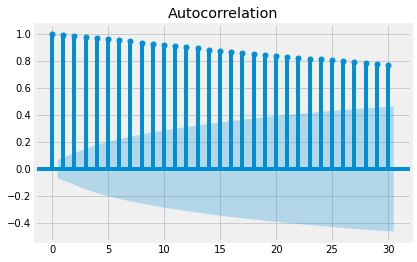

In [20]:
df=df.dropna()

preventDoubleImage = plot_acf(df.spx)

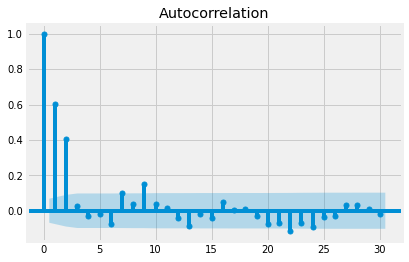

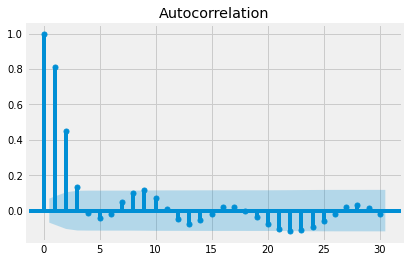

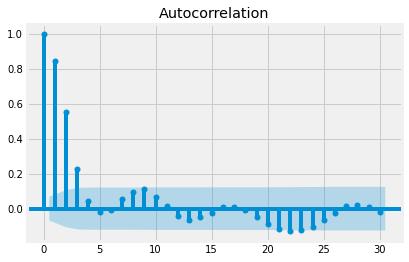

In [21]:
preventDoubleImage = plot_acf(df.spx_1DayDiff)
preventDoubleImage = plot_acf(df.spx_2DayDiff)
preventDoubleImage = plot_acf(df.spx_3DayDiff)

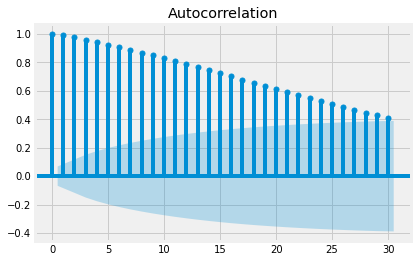

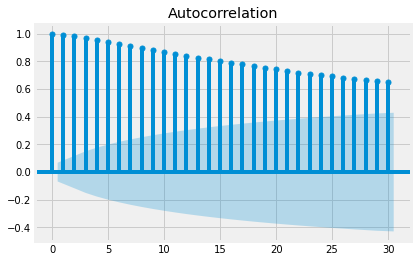

In [22]:
period =17

preventDoubleImage = plot_acf(df.spx_1YearDiff)
preventDoubleImage = plot_acf(df.spx_2YearDiff)


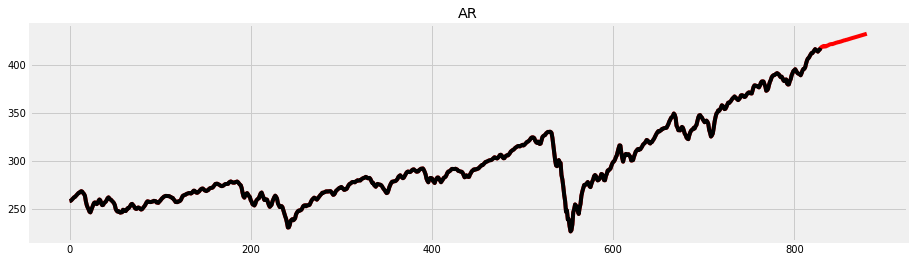

In [23]:
train = df.spx_three.values[2:]
lenTrain = len(train)
model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=lenTrain,end=lenTrain+50)

plt.figure(figsize=(14,4))
plt.title("AR")
plt.plot(np.append(train,predictions),c='r')
plt.plot(train,c='k')
plt.show()

In [24]:
# p (Auto-Regressive) = periods laged of dependent variable.
# d (Moving Average)  = lagged forecast errors in prediction function
# q (Differences)     =  the number of nonseasonal differences,
model_arima = ARIMA(train,order=(17, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

2812.276042661685


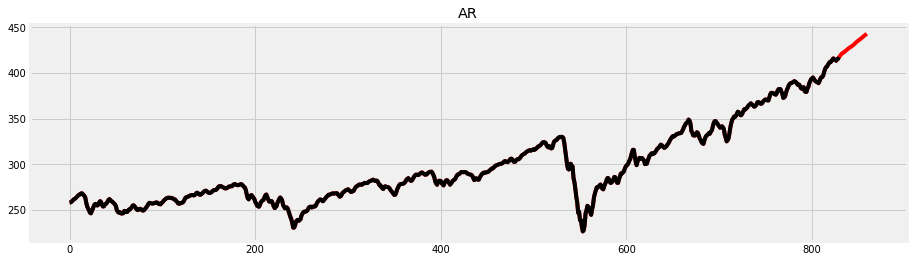

In [25]:
predictions= model_arima_fit.forecast(steps=30)[0]

plt.figure(figsize=(14,4))
plt.title("AR")
plt.plot(np.append(train,predictions),c='r')
plt.plot(train,c='k')
plt.show()

#### change first line of code to run. expected runtime ~1 mins per test. 7*7 =49 test in total  

In [ ]:
if False: 
  d=q=range(0,4)
  pdq = list(itertools.product(d,q))

  myList=[]
  for x in pdq:
    myList.append((period,x[0],x[1]))
  pdq = myList

  pdq = myList


  warnings.filterwarnings('ignore')
  lowest = 999999999999999
  bestModel =None 
  for param in pdq:
      try:
          model_arima = ARIMA(train,order=param)
          model_arima_fit = model_arima.fit()
          print(param,model_arima_fit.aic)

          if (not np.isnan(model_arima_fit.aic) and model_arima_fit.aic < lowest):
            lowest = model_arima_fit.aic
            bestModel=model_arima_fit
      except:
          continue


  predictions= bestModel.forecast(steps=30)[0]

  plt.figure(figsize=(14,4))
  plt.title("AR")
  plt.plot(np.append(train,predictions),c='r')
  plt.plot(train,c='k')
  plt.show()

(17, 0, 0) 2796.8284018464337
(17, 1, 0) 2775.9633789241784
(17, 1, 1) 2774.056161815314
(17, 1, 2) 2710.2277149984925
(17, 1, 3) 2710.8956784005672


# lets try with SARIMA 


# not really usedful 


my code for this: https://colab.research.google.com/drive/1eGvqsOfjhxFV0SQ6tSWHKKt8UByj2zPI

```
from pmdarima import auto_arima

stepwise_fit = auto_arima(df_train['y'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()
```



# lets predict with Facebooks' prophet libaray 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


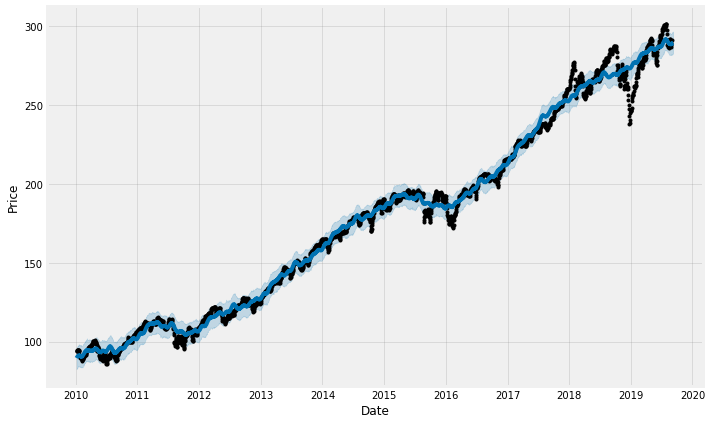

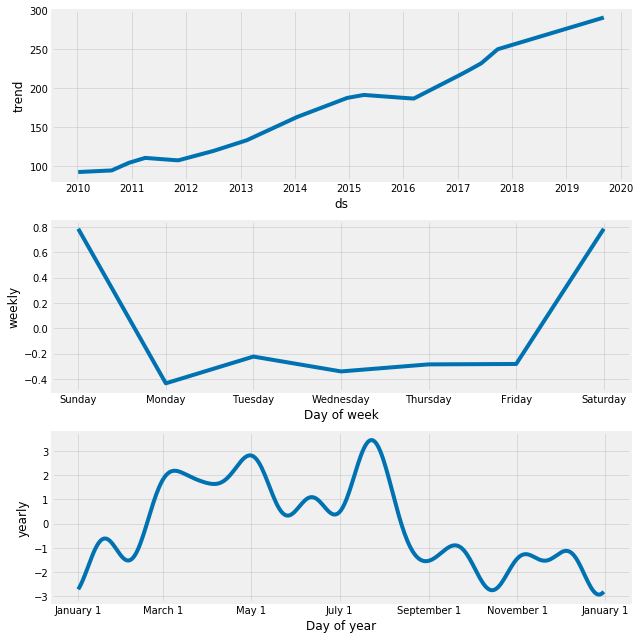

In [ ]:
def Predict(stock,n):

  spx = web.DataReader("spy", "yahoo", '2010-01-01')
  spx = spx["Adj Close"]

  spx_three = np.round(spx.rolling(window = 3, center = False).mean(), 2)
  spx_1DayDiff = spx_three - spx_three.shift(1)

  df=pd.DataFrame({"y":spx_three})

  dates =[]
  for x in range(len(df)):
      newdate = str(df.index[x])
      newdate = newdate[0:10]
      dates.append(newdate)

  df = pd.DataFrame({
                     "ds":dates,
                     "y":spx_three
                    # ,"spx_1DayDiff":spx_1DayDiff  
                  })

  df=df.dropna()
  m = Prophet().fit(df)
  future = m.make_future_dataframe(periods=n)
  
  forecast = m.predict(future)
  forecast['day_week'] = forecast.ds.dt.weekday_name
  forecast = forecast[forecast.day_week != 'Sunday']
  forecast = forecast[forecast.day_week != 'Saturday']
  m.plot(forecast,xlabel='Date', ylabel='Price')
  m.plot_components(forecast)
  plt.show()
  return forecast

forecast = Predict(share,10)

In [ ]:
forecast= forecast[['ds','yhat','day_week']]
forecastPlot=forecast[['yhat']]
mySlice = forecast.ds


# VAR

not too useful, more details here 

https://drive.google.com/open?id=1qPliSoDVQ_K1v-9xry8C56paKXfg25Zh